Caret is the Sklearn equivalent for R it's a great R package which provides general interface to more than 150 ML algorithms. It also provides great functions to sample the data (for training and testing), preprocessing, evaluating the model etc.,

For more info on Caret goto:
https://www.youtube.com/watch?v=7Jbb2ItbTC4 


In [7]:
library(caret)

Loading required package: lattice
Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [8]:
library(e1071)#support package to caret

# 0. Load data

In [9]:
# library(ISLR) #using smarket: Daily percentage returns for the S&P 500 stock index between 2001 and 2005

In [90]:
#import and read data
df <- read.csv("fullofflinedf.csv", header = TRUE)

# 1. Data description

In [91]:
head(df)

X,posX,posY,angle,X00.14.bf.b1.97.8a,X00.14.bf.b1.97.90,X00.0f.a3.39.e1.c0,X00.14.bf.b1.97.8d,X00.14.bf.b1.97.81,X00.14.bf.3b.c7.c6,X00.0f.a3.39.dd.cd
1,0,0,0,-41.98489,-57.20774,-51.15455,-64.55649,-62.84349,-65.38813,-68.13182
2,0,1,0,-44.97125,-58.22891,-50.57273,-61.07673,-67.18656,-65.19788,-70.33636
3,0,2,0,-47.72008,-58.70679,-59.95455,-61.81601,-61.18764,-61.26058,-68.49831
4,0,3,0,-51.10097,-56.79017,-55.53636,-58.28706,-56.71622,-62.36238,-69.08939
5,0,4,0,-49.08489,-53.58976,-48.09091,-63.42386,-57.11135,-64.77592,-68.96818
6,0,7,0,-46.97932,-62.51826,-57.30000,-55.15113,-64.02953,-64.57951,-71.43636




Description:




# 2. DATA EXPLORATION

In [92]:
str(df)

'data.frame':	1328 obs. of  11 variables:
 $ X                 : int  1 2 3 4 5 6 7 8 9 10 ...
 $ posX              : int  0 0 0 0 0 0 0 0 0 0 ...
 $ posY              : int  0 1 2 3 4 7 8 9 10 11 ...
 $ angle             : int  0 0 0 0 0 0 0 0 0 0 ...
 $ X00.14.bf.b1.97.8a: num  -42 -45 -47.7 -51.1 -49.1 ...
 $ X00.14.bf.b1.97.90: num  -57.2 -58.2 -58.7 -56.8 -53.6 ...
 $ X00.0f.a3.39.e1.c0: num  -51.2 -50.6 -60 -55.5 -48.1 ...
 $ X00.14.bf.b1.97.8d: num  -64.6 -61.1 -61.8 -58.3 -63.4 ...
 $ X00.14.bf.b1.97.81: num  -62.8 -67.2 -61.2 -56.7 -57.1 ...
 $ X00.14.bf.3b.c7.c6: num  -65.4 -65.2 -61.3 -62.4 -64.8 ...
 $ X00.0f.a3.39.dd.cd: num  -68.1 -70.3 -68.5 -69.1 -69 ...


In [93]:
summary(df)

       X               posX            posY            angle       
 Min.   :   1.0   Min.   : 0.00   Min.   : 0.000   Min.   :  0.00  
 1st Qu.: 332.8   1st Qu.: 3.00   1st Qu.: 3.000   1st Qu.: 45.00  
 Median : 664.5   Median :13.00   Median : 6.500   Median : 45.00  
 Mean   : 664.5   Mean   :14.25   Mean   : 5.916   Mean   : 73.12  
 3rd Qu.: 996.2   3rd Qu.:23.00   3rd Qu.: 8.000   3rd Qu.:101.25  
 Max.   :1328.0   Max.   :33.00   Max.   :13.000   Max.   :180.00  
 X00.14.bf.b1.97.8a X00.14.bf.b1.97.90 X00.0f.a3.39.e1.c0 X00.14.bf.b1.97.8d
 Min.   :-72.94     Min.   :-83.56     Min.   :-71.07     Min.   :-67.94    
 1st Qu.:-62.45     1st Qu.:-73.49     1st Qu.:-57.39     1st Qu.:-57.55    
 Median :-58.51     Median :-68.80     Median :-53.81     Median :-52.92    
 Mean   :-57.08     Mean   :-66.79     Mean   :-53.79     Mean   :-53.05    
 3rd Qu.:-52.42     3rd Qu.:-60.44     3rd Qu.:-50.51     3rd Qu.:-48.60    
 Max.   :-34.92     Max.   :-40.23     Max.   :-40.51     Max.

In [94]:
colnames(df, do.NULL = TRUE, prefix = "col")

[1] "X"                  "posX"               "posY"              
 [4] "angle"              "X00.14.bf.b1.97.8a" "X00.14.bf.b1.97.90"
 [7] "X00.0f.a3.39.e1.c0" "X00.14.bf.b1.97.8d" "X00.14.bf.b1.97.81"
[10] "X00.14.bf.3b.c7.c6" "X00.0f.a3.39.dd.cd"

# 3. PREPROCESSING
(clean up the data to get it ready to pass it in the machine)

In [95]:
# check for na and impute or remove na 
is.na(df)

X,posX,posY,angle,X00.14.bf.b1.97.8a,X00.14.bf.b1.97.90,X00.0f.a3.39.e1.c0,X00.14.bf.b1.97.8d,X00.14.bf.b1.97.81,X00.14.bf.3b.c7.c6,X00.0f.a3.39.dd.cd
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE


In [96]:
#2. TODO: variable imputation check and replace missing value using knn
#remove na quick fix
df2 <- na.omit(df) 

In [97]:
str(df2) ### no value remove

'data.frame':	1328 obs. of  11 variables:
 $ X                 : int  1 2 3 4 5 6 7 8 9 10 ...
 $ posX              : int  0 0 0 0 0 0 0 0 0 0 ...
 $ posY              : int  0 1 2 3 4 7 8 9 10 11 ...
 $ angle             : int  0 0 0 0 0 0 0 0 0 0 ...
 $ X00.14.bf.b1.97.8a: num  -42 -45 -47.7 -51.1 -49.1 ...
 $ X00.14.bf.b1.97.90: num  -57.2 -58.2 -58.7 -56.8 -53.6 ...
 $ X00.0f.a3.39.e1.c0: num  -51.2 -50.6 -60 -55.5 -48.1 ...
 $ X00.14.bf.b1.97.8d: num  -64.6 -61.1 -61.8 -58.3 -63.4 ...
 $ X00.14.bf.b1.97.81: num  -62.8 -67.2 -61.2 -56.7 -57.1 ...
 $ X00.14.bf.3b.c7.c6: num  -65.4 -65.2 -61.3 -62.4 -64.8 ...
 $ X00.0f.a3.39.dd.cd: num  -68.1 -70.3 -68.5 -69.1 -69 ...


In [98]:
# 1. Split train and test set

In [99]:
set.seed(300) 
#Spliting data as training and test set. Using createDataPartition() function from caret
indxTrain <- createDataPartition(y = df$posY,p = 0.75,list = FALSE)
training <- df[indxTrain,]
testing <- df[-indxTrain,]

In [100]:
str(training)

'data.frame':	996 obs. of  11 variables:
 $ X                 : int  2 3 4 5 6 7 10 11 12 13 ...
 $ posX              : int  0 0 0 0 0 0 0 0 0 1 ...
 $ posY              : int  1 2 3 4 7 8 11 12 13 0 ...
 $ angle             : int  0 0 0 0 0 0 0 0 0 0 ...
 $ X00.14.bf.b1.97.8a: num  -45 -47.7 -51.1 -49.1 -47 ...
 $ X00.14.bf.b1.97.90: num  -58.2 -58.7 -56.8 -53.6 -62.5 ...
 $ X00.0f.a3.39.e1.c0: num  -50.6 -60 -55.5 -48.1 -57.3 ...
 $ X00.14.bf.b1.97.8d: num  -61.1 -61.8 -58.3 -63.4 -55.2 ...
 $ X00.14.bf.b1.97.81: num  -67.2 -61.2 -56.7 -57.1 -64 ...
 $ X00.14.bf.3b.c7.c6: num  -65.2 -61.3 -62.4 -64.8 -64.6 ...
 $ X00.0f.a3.39.dd.cd: num  -70.3 -68.5 -69.1 -69 -71.4 ...


In [101]:
# variabe standardization or normalized or (centered and scaled). using the caret pre-process  object
trainX <- training[,names(training)!= "angle"] ## remove not numerical column
preProcObj <- preProcess(x = trainX,method = c("center", "scale"))
preProcObj

Created from 996 samples and 10 variables

Pre-processing:
  - centered (10)
  - ignored (0)
  - scaled (10)


In [102]:
preProc_trainX <- predict(preProcObj, trainX)

In [103]:
head(preProc_trainX)

,X,posX,posY,X00.14.bf.b1.97.8a,X00.14.bf.b1.97.90,X00.0f.a3.39.e1.c0,X00.14.bf.b1.97.8d,X00.14.bf.b1.97.81,X00.14.bf.3b.c7.c6,X00.0f.a3.39.dd.cd
2,-1.715361,-1.356032,-1.8354694,1.6480120,0.9895636,0.6736333,-1.2773893,-1.9161961,-0.87150354,0.007259305
3,-1.712770,-1.356032,-1.4626105,1.2760085,0.9345691,-1.2486594,-1.3932194,-0.9071202,-0.09130918,0.263008667
4,-1.710179,-1.356032,-1.0897515,0.8184665,1.1551318,-0.3433936,-0.8403099,-0.1549845,-0.30963519,0.180763956
5,-1.707587,-1.356032,-0.7168925,1.0913062,1.5234308,1.1821468,-1.6451338,-0.2214488,-0.78789059,0.197629536
6,-1.704996,-1.356032,0.4016844,1.3762566,0.4959504,-0.7047549,-0.3489783,-1.3851532,-0.74897086,-0.145795831
7,-1.702405,-1.356032,0.7745434,1.1807995,1.5281150,0.8375498,-1.0830931,-1.0330409,-1.04139945,0.317164332


In [104]:
summary(preProc_trainX)

       X                 posX              posY         X00.14.bf.b1.97.8a
 Min.   :-1.71536   Min.   :-1.3560   Min.   :-2.2083   Min.   :-2.1366   
 1st Qu.:-0.87382   1st Qu.:-1.0741   1st Qu.:-1.0898   1st Qu.:-0.7443   
 Median : 0.00659   Median :-0.1343   Median : 0.2153   Median :-0.2000   
 Mean   : 0.00000   Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000   
 3rd Qu.: 0.86497   3rd Qu.: 0.8995   3rd Qu.: 0.7745   3rd Qu.: 0.6270   
 Max.   : 1.72077   Max.   : 1.7454   Max.   : 2.6388   Max.   : 3.0081   
 X00.14.bf.b1.97.90 X00.0f.a3.39.e1.c0 X00.14.bf.b1.97.8d X00.14.bf.b1.97.81
 Min.   :-1.8321    Min.   :-3.5261    Min.   :-2.35275   Min.   :-2.6020   
 1st Qu.:-0.7885    1st Qu.:-0.7290    1st Qu.:-0.72529   1st Qu.:-0.6251   
 Median :-0.2310    Median :-0.0286    Median : 0.03259   Median :-0.0353   
 Mean   : 0.0000    Mean   : 0.0000    Mean   : 0.00000   Mean   : 0.0000   
 3rd Qu.: 0.7458    3rd Qu.: 0.6871    3rd Qu.: 0.71277   3rd Qu.: 0.6374   
 Max.   : 3.0

# 4. FIT MODEL & PREDICT

In [105]:
# multi-variate knn-reg
#predictor (dependent variable ): tem <-  
#knn.reg(train, test = NULL, y, k = 3, algorithm=c("kd_tree", 
#         "cover_tree", "brute"))

In [106]:
########### TRAINING THE X COORDINATE  MODEL#######################

In [107]:
head(trainX[,names(trainX)!= "posY"])

,X,posX,X00.14.bf.b1.97.8a,X00.14.bf.b1.97.90,X00.0f.a3.39.e1.c0,X00.14.bf.b1.97.8d,X00.14.bf.b1.97.81,X00.14.bf.3b.c7.c6,X00.0f.a3.39.dd.cd
2,2,0,-44.97125,-58.22891,-50.57273,-61.07673,-67.18656,-65.19788,-70.33636
3,3,0,-47.72008,-58.70679,-59.95455,-61.81601,-61.18764,-61.26058,-68.49831
4,4,0,-51.10097,-56.79017,-55.53636,-58.28706,-56.71622,-62.36238,-69.08939
5,5,0,-49.08489,-53.58976,-48.09091,-63.42386,-57.11135,-64.77592,-68.96818
6,6,0,-46.97932,-62.51826,-57.30000,-55.15113,-64.02953,-64.57951,-71.43636
7,7,0,-48.42360,-53.54905,-49.77273,-59.83663,-61.93624,-66.05527,-68.10909


In [108]:
set.seed(400)
ctrl <- trainControl(method="repeatedcv",repeats = 3) # default 10 fold cross validation during training and do 3 time the 10 fold CV
knnFit_x <- train(posX ~ ., data = trainX[,names(trainX)!= "posY"], method = "knn", trControl = ctrl, preProcess = c("center","scale"), tuneLength = 20)##tuneLengh to atomatically try 20  k value

#Output of kNN fit
knnFit_x

k-Nearest Neighbors 

996 samples
  8 predictor

Pre-processing: centered (8), scaled (8) 
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 895, 897, 896, 897, 897, 897, ... 
Resampling results across tuning parameters:

  k   RMSE      Rsquared   MAE     
   5  2.115603  0.9607116  1.542962
   7  2.107759  0.9610698  1.557189
   9  2.116282  0.9609416  1.592994
  11  2.127381  0.9607200  1.606583
  13  2.155236  0.9598073  1.638334
  15  2.178415  0.9589898  1.661294
  17  2.185262  0.9588415  1.666646
  19  2.205656  0.9581346  1.677972
  21  2.224366  0.9574327  1.689781
  23  2.243309  0.9567434  1.702622
  25  2.257420  0.9562518  1.718163
  27  2.275706  0.9555569  1.734182
  29  2.281392  0.9553899  1.739463
  31  2.298880  0.9547570  1.754588
  33  2.317179  0.9541120  1.770744
  35  2.333714  0.9535192  1.781823
  37  2.348600  0.9529883  1.794320
  39  2.364069  0.9524081  1.810921
  41  2.374966  0.9519918  1.821831
  43  2.383705  0.9516975 

### The best k is the one that minimize the prediction error RMSE (root mean squared error).

### The RMSE corresponds to the square root of the average difference between the observed known outcome values and the predicted values, RMSE = mean((observeds - predicteds)^2) %>% sqrt(). The lower the RMSE, the better the model.

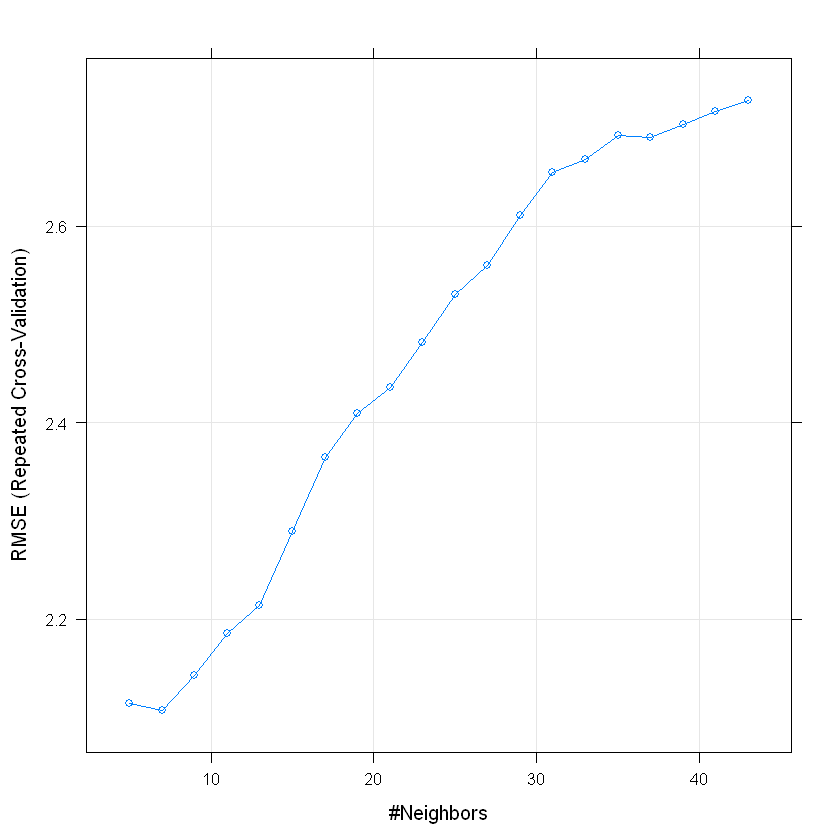

In [109]:
#Plotting yields Number of Neighbours Vs accuracy (based on repeated cross validation)
plot(knnFit_y)

In [110]:
# Print the best tuning parameter k that
# maximizes model accuracy
knnFit_x$bestTune

,k
2,7


In [111]:
head(testing[,names(testing)!= "angle"])

,X,posX,posY,X00.14.bf.b1.97.8a,X00.14.bf.b1.97.90,X00.0f.a3.39.e1.c0,X00.14.bf.b1.97.8d,X00.14.bf.b1.97.81,X00.14.bf.3b.c7.c6,X00.0f.a3.39.dd.cd
1,1,0,0,-41.98489,-57.20774,-51.15455,-64.55649,-62.84349,-65.38813,-68.13182
8,8,0,9,-53.45483,-56.47158,-50.99091,-62.92592,-64.46243,-66.68757,-67.06364
9,9,0,10,-46.46788,-49.69152,-56.20000,-65.81888,-62.55442,-64.22914,-69.20000
18,18,1,5,-47.02975,-58.54078,-52.40909,-59.93825,-62.29847,-68.01485,-66.86364
20,20,1,7,-52.23269,-53.51249,-52.28182,-52.96969,-62.84425,-66.39676,-68.50570
26,26,1,13,-48.17242,-43.29275,-57.20000,-66.23571,-69.81632,-69.90508,-75.82727


In [112]:
testing_X = testing[,(names(testing)!= "angle" & names(testing)!= "posY")]
head(testing_X)

,X,posX,X00.14.bf.b1.97.8a,X00.14.bf.b1.97.90,X00.0f.a3.39.e1.c0,X00.14.bf.b1.97.8d,X00.14.bf.b1.97.81,X00.14.bf.3b.c7.c6,X00.0f.a3.39.dd.cd
1,1,0,-41.98489,-57.20774,-51.15455,-64.55649,-62.84349,-65.38813,-68.13182
8,8,0,-53.45483,-56.47158,-50.99091,-62.92592,-64.46243,-66.68757,-67.06364
9,9,0,-46.46788,-49.69152,-56.20000,-65.81888,-62.55442,-64.22914,-69.20000
18,18,1,-47.02975,-58.54078,-52.40909,-59.93825,-62.29847,-68.01485,-66.86364
20,20,1,-52.23269,-53.51249,-52.28182,-52.96969,-62.84425,-66.39676,-68.50570
26,26,1,-48.17242,-43.29275,-57.20000,-66.23571,-69.81632,-69.90508,-75.82727


In [113]:
knnPredict_X <- predict(knnFit_x,newdata = testing_X)
#Get the confusion matrix to see accuracy value and other parameter values
# confusionMatrix(pred_knn, test_w_a$posX) ### df[c("posX","posY")]

In [114]:
# can't compute confusion matrix for non factor prediction
# we Compute the prediction error RMSE
#For the RMSE value, For good predictive model RMSE values should be low  <0.3, for rmse in range [0,1]
RMSE(knnPredict_X, testing$posX)

[1] 2.250959

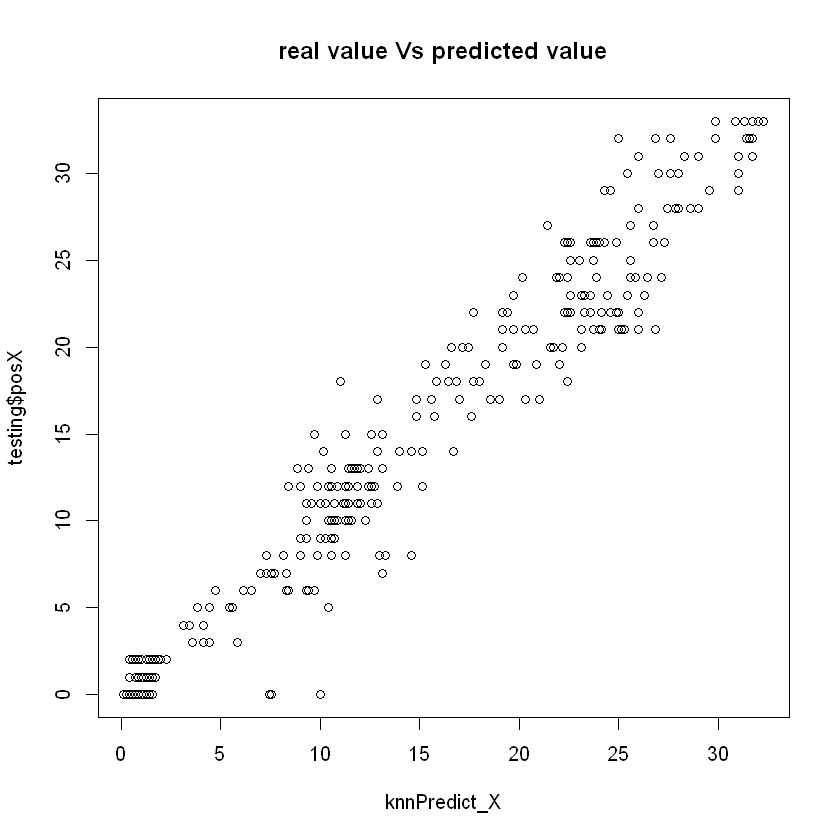

In [115]:
## show how error graoh real value Vs predicted value
plot(knnPredict_X, testing$posX,main = "real value Vs predicted value")


### based on the single value postX prediction, we can clearly see that real value is a function of the predicted value, so real value = predictedValue + error or =  a*predictedValue + b
### we can optimize our model by defining and b  or by fitting a linear model between knn and testvalue. 

In [116]:
########### TRAINING THE Y COORDINATE  MODEL#######################
set.seed(400)
ctrl <- trainControl(method="repeatedcv",repeats = 3) # default 10 fold cross validation during training and do 3 time the 10 fold CV
knnFit_y <- train(posY~ ., data = trainX[,names(trainX)!= "posX"], method = "knn", trControl = ctrl, preProcess = c("center","scale"), tuneLength = 20)##tuneLengh to atomatically try 20  k value

#Output of kNN fit
knnFit_y

k-Nearest Neighbors 

996 samples
  8 predictor

Pre-processing: centered (8), scaled (8) 
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 896, 896, 896, 898, 896, 896, ... 
Resampling results across tuning parameters:

  k   RMSE      Rsquared   MAE     
   5  1.434178  0.7138089  1.022725
   7  1.450772  0.7085777  1.057939
   9  1.461949  0.7069734  1.077269
  11  1.465091  0.7083135  1.086334
  13  1.465480  0.7112772  1.095703
  15  1.473352  0.7111843  1.108832
  17  1.481548  0.7114171  1.123134
  19  1.490505  0.7116385  1.139111
  21  1.501696  0.7106212  1.155743
  23  1.511046  0.7101985  1.171085
  25  1.524999  0.7076900  1.187974
  27  1.538155  0.7053470  1.204652
  29  1.550261  0.7042686  1.218599
  31  1.564213  0.7029830  1.236166
  33  1.573509  0.7030432  1.247253
  35  1.585150  0.7014036  1.258977
  37  1.600613  0.6973052  1.274024
  39  1.612547  0.6957643  1.286938
  41  1.626819  0.6928315  1.300450
  43  1.639505  0.6909311 

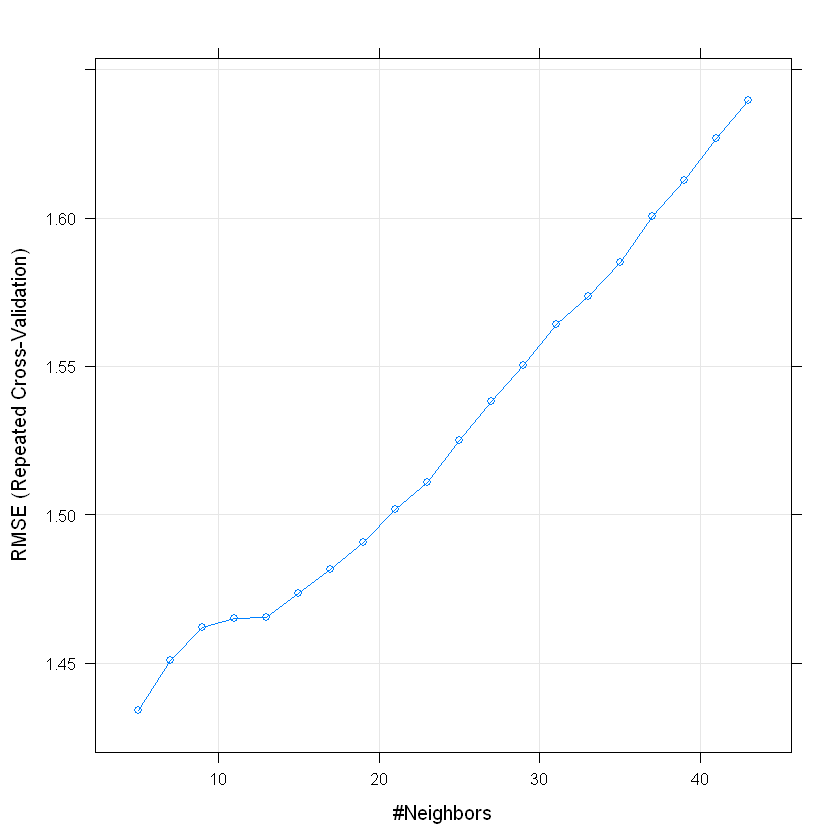

In [117]:
#Plotting yields Number of Neighbours Vs accuracy (based on repeated cross validation)
plot(knnFit_y)

In [118]:
testing_Y = testing[,(names(testing)!= "angle" & names(testing)!= "posX")]

In [119]:
knnPredict_Y <- predict(knnFit_y,newdata = testing_Y)

In [120]:
# can't compute confusion matrix for non factor prediction
# we Compute the prediction error RMSE
RMSE(knnPredict_Y, testing$posY)

[1] 1.358512

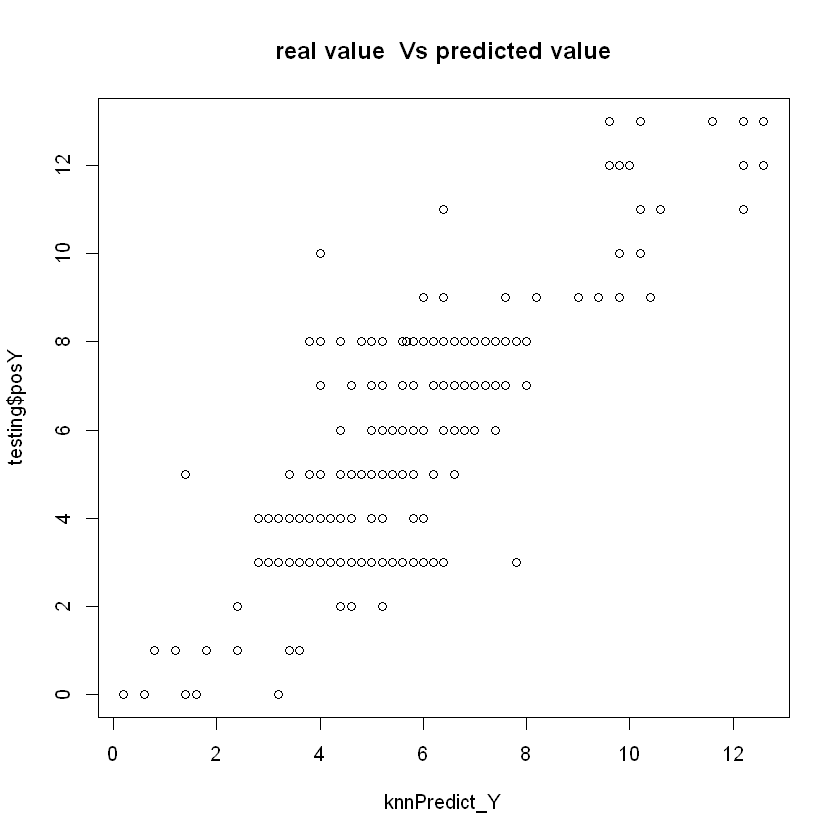

In [121]:
## show how error graoh real value Vs predicted value
plot(knnPredict_Y, testing$posY,main = "real value  Vs predicted value")

In [42]:
# manually compute accuracy
# Compute model accuracy rate
# mean(predicted.classes == test.data$diabetes)

In [122]:
# define the predict function give the test data
pred_x_y <- function(knnFit_x,knnFit_y, testing) {
# function to print return the x and y coordiante for a given entry in the dataset
# take the model fit and dataset to predict
    testing_Y = testing[,(names(testing)!= "angle" & names(testing)!= "posX")]
    knnPredict_Y <- predict(knnFit_y,newdata = testing_Y)
    testing_X = testing[,(names(testing)!= "angle" & names(testing)!= "posY")]
    knnPredict_X <- predict(knnFit_x,newdata = testing_X)
    print(paste(" compute predicted value for each entry in dataset...."))
    myList <- list(x = knnPredict_X, y = knnPredict_Y) 
    myDf <- as.data.frame(myList) 
    print(myList)
    print(myDf)
    return(myDf)
}

In [123]:
data =pred_x_y(knnFit_x, knnFit_y, testing)

[1] " compute predicted value for each entry in dataset...."
$x
  [1]  0.7142857  0.5714286  1.2857143  1.1428571  1.2857143  1.5714286
  [7]  1.5714286  2.0000000  2.2857143  8.4285714  4.7142857  7.2857143
 [13] 10.5714286  9.2857143 10.2857143 11.2857143 13.8571429 11.4285714
 [19] 11.4285714 12.0000000 13.1428571 12.8571429 15.5714286 12.8571429
 [25] 16.8571429 15.2857143 22.0000000 17.1428571 26.0000000 22.4285714
 [31] 24.1428571 22.5714286 23.1428571 21.8571429 24.8571429 26.7142857
 [37] 27.8571429 31.0000000 26.0000000 25.0000000  0.2857143  0.8571429
 [43]  0.7142857  0.5714286  0.2857143  1.1428571  1.1428571  0.8571429
 [49]  2.2857143  0.7142857  1.0000000  4.4285714  5.4285714 10.5714286
 [55] 11.4285714 10.5714286 12.5714286 10.4285714  8.8571429 11.2857143
 [61] 18.0000000 20.8571429 16.2857143 21.5714286 24.1428571 26.8571429
 [67] 19.1428571 19.4285714 22.4285714 24.4285714 25.8571429 22.5714286
 [73] 24.0000000 22.4285714 28.0000000 24.2857143 29.0000000 29.8571429


In [46]:
head(testing)

,X,posX,posY,angle,X00.14.bf.b1.97.8a,X00.14.bf.b1.97.90,X00.0f.a3.39.e1.c0,X00.14.bf.b1.97.8d,X00.14.bf.b1.97.81,X00.14.bf.3b.c7.c6,X00.0f.a3.39.dd.cd
4,4,0,3,0,-51.10097,-56.79017,-55.53636,-58.28706,-56.71622,-62.36238,-69.08939
7,7,0,8,0,-48.42360,-53.54905,-49.77273,-59.83663,-61.93624,-66.05527,-68.10909
8,8,0,9,0,-53.45483,-56.47158,-50.99091,-62.92592,-64.46243,-66.68757,-67.06364
18,18,1,5,0,-47.02975,-58.54078,-52.40909,-59.93825,-62.29847,-68.01485,-66.86364
23,23,1,10,0,-49.51729,-56.57829,-59.46713,-60.94734,-66.25756,-64.50706,-74.08182
25,25,1,12,0,-44.57301,-48.40184,-55.25455,-61.44989,-68.84003,-66.32090,-71.74376


In [73]:
data

x,y
3.428571,3.428571
4.571429,4.571429
5.857143,5.857143
3.714286,3.714286
7.714286,7.714286
11.428571,11.428571
6.428571,6.428571
5.571429,5.571429
3.142857,3.142857
6.571429,6.571429


In [43]:
# ### convert the angle the  to continue value and use the angle as continue value

# #### run the model removing one at the time 
# 00:0f:a3:39:dd:cd

# 00:0f:a3:39:e1:c0


ERROR: Error in parse(text = x, srcfile = src): <text>:4:5: unexpected symbol
3: #### run the model removing one at the time 
4: 00:0f
       ^


In [132]:
 #predicting model for subset of feature(mac address 
#     1. 00:0f:a3:39:dd:cd
df_w_o_cd = df[names(df) != "X00.0f.a3.39.dd.cd"]

In [133]:
head(df_w_o_cd)

X,posX,posY,angle,X00.14.bf.b1.97.8a,X00.14.bf.b1.97.90,X00.0f.a3.39.e1.c0,X00.14.bf.b1.97.8d,X00.14.bf.b1.97.81,X00.14.bf.3b.c7.c6
1,0,0,0,-41.98489,-57.20774,-51.15455,-64.55649,-62.84349,-65.38813
2,0,1,0,-44.97125,-58.22891,-50.57273,-61.07673,-67.18656,-65.19788
3,0,2,0,-47.72008,-58.70679,-59.95455,-61.81601,-61.18764,-61.26058
4,0,3,0,-51.10097,-56.79017,-55.53636,-58.28706,-56.71622,-62.36238
5,0,4,0,-49.08489,-53.58976,-48.09091,-63.42386,-57.11135,-64.77592
6,0,7,0,-46.97932,-62.51826,-57.30000,-55.15113,-64.02953,-64.57951


In [134]:
names(df_w_o_cd)

[1] "X"                  "posX"               "posY"              
 [4] "angle"              "X00.14.bf.b1.97.8a" "X00.14.bf.b1.97.90"
 [7] "X00.0f.a3.39.e1.c0" "X00.14.bf.b1.97.8d" "X00.14.bf.b1.97.81"
[10] "X00.14.bf.3b.c7.c6"

In [145]:
# 1. split the data
set.seed(300) 
#Spliting data as training and test set. Using createDataPartition() function from caret
indxTrain <- createDataPartition(y = df_w_o_cd$posY,p = 0.75,list = FALSE)
training <- df_w_o_cd[indxTrain,]
testing <- df_w_o_cd[-indxTrain,]
testing_X <- testing[,(names(testing)!= "angle" & names(testing)!= "posY")]
testing_Y <- testing[,(names(testing)!= "angle" & names(testing)!= "posX")]

In [146]:
# 2. fit the model for x 
set.seed(400)
ctrl <- trainControl(method="repeatedcv",repeats = 3) # default 10 fold cross validation during training and do 3 time the 10 fold CV
knnFit_x <- train(posX ~ ., data = training[,(names(training)!= "posY" & names(training)!= "angle")], method = "knn", trControl = ctrl, preProcess = c("center","scale"), tuneLength = 20)##tuneLengh to atomatically try 20  k value

#Output of kNN fit
knnFit_x

k-Nearest Neighbors 

996 samples
  7 predictor

Pre-processing: centered (7), scaled (7) 
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 895, 897, 896, 897, 897, 897, ... 
Resampling results across tuning parameters:

  k   RMSE      Rsquared   MAE     
   5  2.154016  0.9590908  1.581310
   7  2.166108  0.9587253  1.607810
   9  2.192524  0.9579164  1.647979
  11  2.207945  0.9575720  1.665119
  13  2.229415  0.9568701  1.685606
  15  2.245221  0.9563796  1.698468
  17  2.266398  0.9556355  1.712725
  19  2.291792  0.9548274  1.736839
  21  2.319101  0.9538866  1.756467
  23  2.343827  0.9529980  1.774595
  25  2.360227  0.9524237  1.785805
  27  2.381223  0.9516293  1.804601
  29  2.395026  0.9511566  1.820093
  31  2.413417  0.9504920  1.833990
  33  2.423322  0.9501623  1.844897
  35  2.445682  0.9493356  1.861368
  37  2.461184  0.9487539  1.874081
  39  2.472373  0.9483761  1.886309
  41  2.483641  0.9479407  1.895133
  43  2.496761  0.9474546 

[1] 2.341687

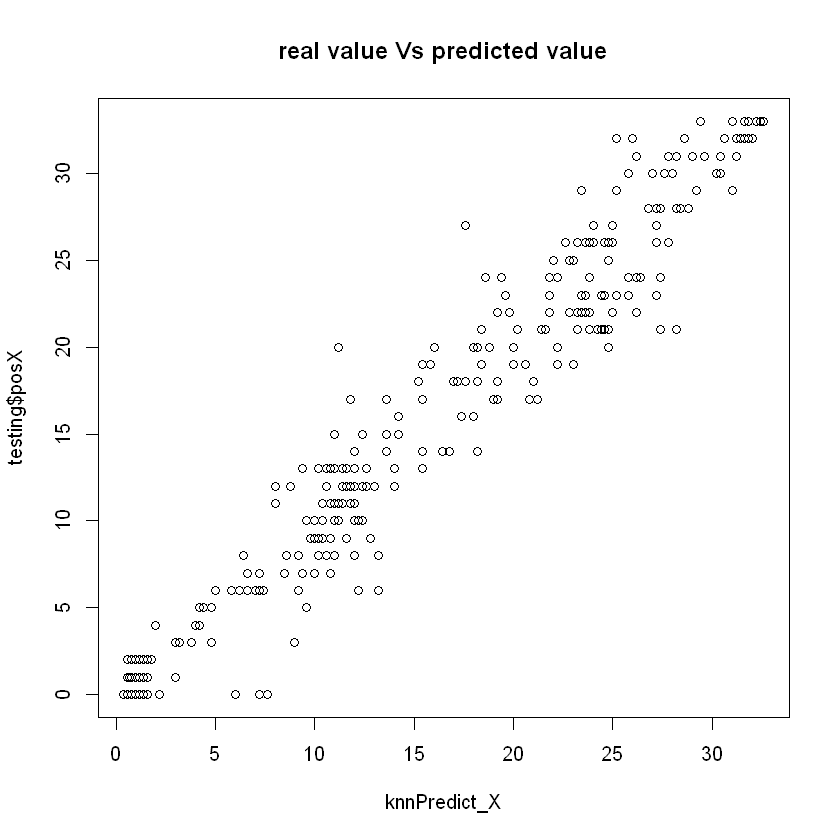

In [149]:
knnPredict_X <- predict(knnFit_x,newdata = testing_X)

RMSE(knnPredict_X, testing$posX)

## show how error graoh real value Vs predicted value
plot(knnPredict_X, testing$posX,main = "real value Vs predicted value")	

In [143]:
set.seed(400)
ctrl <- trainControl(method="repeatedcv",repeats = 3) # default 10 fold cross validation during training and do 3 time the 10 fold CV
knnFit_y <- train(posY ~ ., data = training[,(names(training)!= "posX" & names(training)!= "angle")], method = "knn", trControl = ctrl, preProcess = c("center","scale"), tuneLength = 20)##tuneLengh to atomatically try 20  k value

#Output of kNN fit
knnFit_y

k-Nearest Neighbors 

996 samples
  7 predictor

Pre-processing: centered (7), scaled (7) 
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 896, 896, 896, 898, 896, 896, ... 
Resampling results across tuning parameters:

  k   RMSE      Rsquared   MAE     
   5  1.465867  0.6997646  1.041917
   7  1.460546  0.7041473  1.048955
   9  1.454819  0.7096665  1.063778
  11  1.453368  0.7133727  1.075437
  13  1.471721  0.7079629  1.102004
  15  1.490631  0.7035232  1.124631
  17  1.504361  0.7006688  1.140620
  19  1.512544  0.7005143  1.153263
  21  1.518718  0.7011152  1.166529
  23  1.529421  0.7010904  1.184617
  25  1.544855  0.6985745  1.201827
  27  1.557614  0.6962253  1.215117
  29  1.570907  0.6929674  1.228495
  31  1.581030  0.6914481  1.238885
  33  1.590237  0.6907253  1.249587
  35  1.599955  0.6909196  1.261911
  37  1.613028  0.6884659  1.275488
  39  1.626566  0.6854727  1.288706
  41  1.638563  0.6837238  1.301206
  43  1.650540  0.6823964 

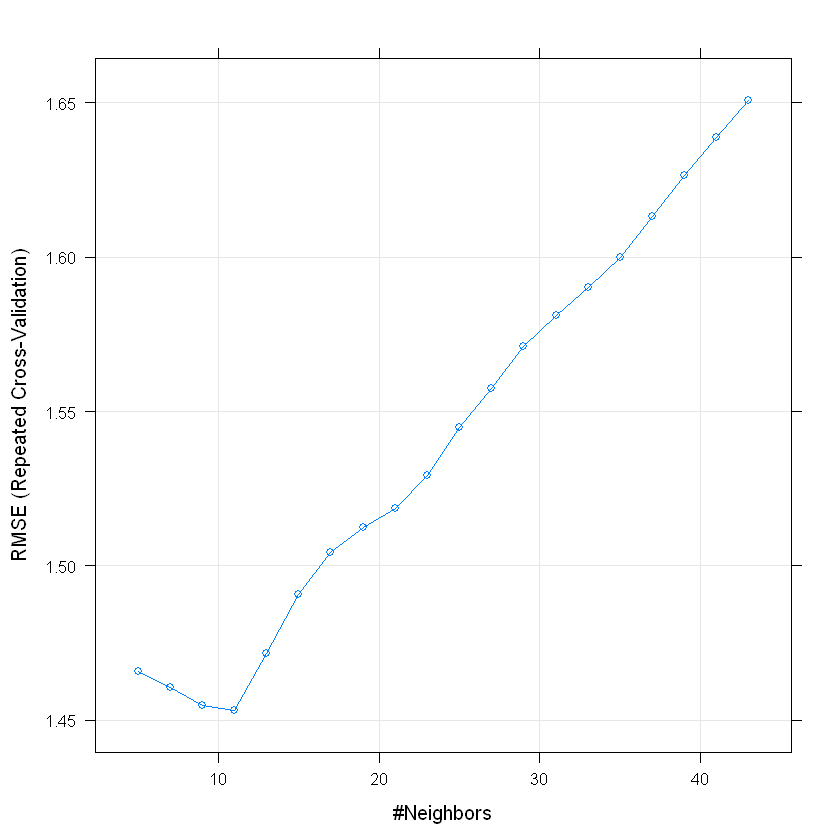

In [144]:
plot(knnFit_y)

[1] 1.358222

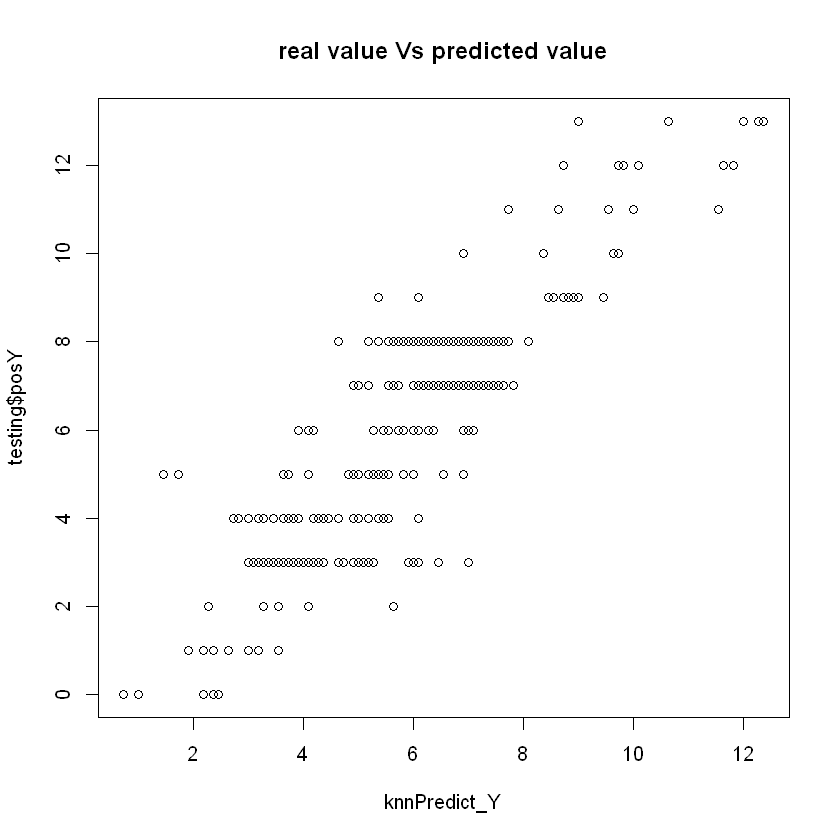

In [148]:
knnPredict_Y <- predict(knnFit_y,newdata = testing_Y)

RMSE(knnPredict_Y, testing$posY)

## show how error graoh real value Vs predicted value
plot(knnPredict_Y, testing$posY,main = "real value Vs predicted value")	

X,posX,posY,angle,X00.14.bf.b1.97.8a,X00.14.bf.b1.97.90,X00.14.bf.b1.97.8d,X00.14.bf.b1.97.81,X00.14.bf.3b.c7.c6,X00.0f.a3.39.dd.cd
1,0,0,0,-41.98489,-57.20774,-64.55649,-62.84349,-65.38813,-68.13182
2,0,1,0,-44.97125,-58.22891,-61.07673,-67.18656,-65.19788,-70.33636
3,0,2,0,-47.72008,-58.70679,-61.81601,-61.18764,-61.26058,-68.49831
4,0,3,0,-51.10097,-56.79017,-58.28706,-56.71622,-62.36238,-69.08939
5,0,4,0,-49.08489,-53.58976,-63.42386,-57.11135,-64.77592,-68.96818
6,0,7,0,-46.97932,-62.51826,-55.15113,-64.02953,-64.57951,-71.43636


[1] "X"                  "posX"               "posY"              
 [4] "angle"              "X00.14.bf.b1.97.8a" "X00.14.bf.b1.97.90"
 [7] "X00.14.bf.b1.97.8d" "X00.14.bf.b1.97.81" "X00.14.bf.3b.c7.c6"
[10] "X00.0f.a3.39.dd.cd"

k-Nearest Neighbors 

996 samples
  7 predictor

Pre-processing: centered (7), scaled (7) 
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 895, 897, 896, 897, 897, 897, ... 
Resampling results across tuning parameters:

  k   RMSE      Rsquared   MAE     
   5  2.184810  0.9578674  1.592427
   7  2.185253  0.9579649  1.595923
   9  2.201711  0.9574628  1.615509
  11  2.197041  0.9577668  1.622691
  13  2.206459  0.9575318  1.642246
  15  2.220265  0.9571256  1.654271
  17  2.228968  0.9568629  1.667544
  19  2.236225  0.9566983  1.675953
  21  2.246346  0.9563762  1.690559
  23  2.254103  0.9561370  1.701033
  25  2.265162  0.9557738  1.712161
  27  2.278151  0.9553480  1.720688
  29  2.282317  0.9552307  1.724178
  31  2.286034  0.9551503  1.730730
  33  2.293334  0.9549179  1.738735
  35  2.303035  0.9545536  1.748285
  37  2.315804  0.9541054  1.759935
  39  2.329034  0.9536260  1.771929
  41  2.335620  0.9533719  1.781650
  43  2.343475  0.9531089 

[1] 2.341943

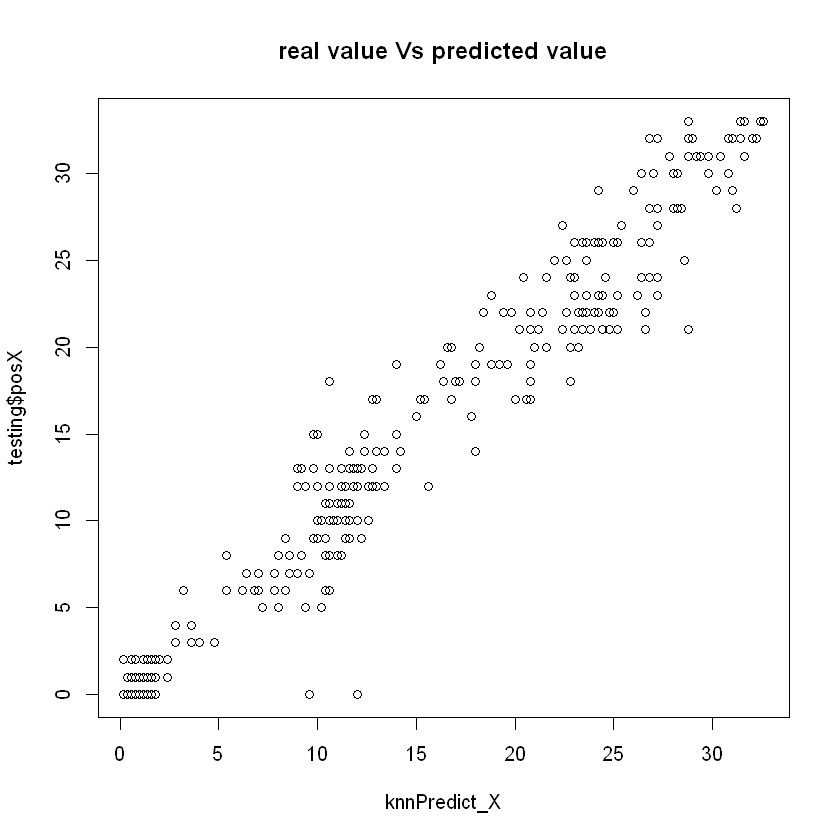

In [152]:
 #predicting model for subset of feature(mac address 
#     1. 00:0f:a3:39:dd:cd
df_w_o_c0 = df[names(df) != "X00.0f.a3.39.e1.c0"] #00:0f:a3:39:e1:c0 X00.0f.a3.39.e1.c0

head(df_w_o_c0)
names(df_w_o_c0)

# 1. split the data
set.seed(300) 
#Spliting data as training and test set. Using createDataPartition() function from caret
indxTrain <- createDataPartition(y = df_w_o_c0$posY,p = 0.75,list = FALSE)
training <- df_w_o_c0[indxTrain,]
testing <- df_w_o_c0[-indxTrain,]
testing_X <- testing[,(names(testing)!= "angle" & names(testing)!= "posY")]
testing_Y <- testing[,(names(testing)!= "angle" & names(testing)!= "posX")]

# 2. fit the model for x 
set.seed(400)
ctrl <- trainControl(method="repeatedcv",repeats = 3) # default 10 fold cross validation during training and do 3 time the 10 fold CV
knnFit_x <- train(posX ~ ., data = training[,(names(training)!= "posY" & names(training)!= "angle")], method = "knn", trControl = ctrl, preProcess = c("center","scale"), tuneLength = 20)##tuneLengh to atomatically try 20  k value

#Output of kNN fit
knnFit_x
knnPredict_X <- predict(knnFit_x,newdata = testing_X)

RMSE(knnPredict_X, testing$posX)

## show how error graoh real value Vs predicted value
plot(knnPredict_X, testing$posX,main = "real value Vs predicted value")

k-Nearest Neighbors 

996 samples
  7 predictor

Pre-processing: centered (7), scaled (7) 
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 896, 896, 896, 898, 896, 896, ... 
Resampling results across tuning parameters:

  k   RMSE      Rsquared   MAE     
   5  1.429497  0.7147994  1.013396
   7  1.444263  0.7115030  1.050422
   9  1.454842  0.7099472  1.077103
  11  1.466534  0.7071811  1.094179
  13  1.476702  0.7052036  1.105066
  15  1.481890  0.7067920  1.111089
  17  1.488617  0.7074014  1.128337
  19  1.507601  0.7024170  1.148795
  21  1.519747  0.7004746  1.165990
  23  1.526800  0.7012187  1.179056
  25  1.531541  0.7032525  1.189878
  27  1.541854  0.7023620  1.202539
  29  1.556089  0.6994974  1.215002
  31  1.565659  0.6990161  1.225602
  33  1.579196  0.6959829  1.237071
  35  1.592171  0.6936648  1.251355
  37  1.606078  0.6910280  1.265723
  39  1.614698  0.6913994  1.275893
  41  1.626710  0.6892197  1.288576
  43  1.637539  0.6884846 

[1] 1.303055

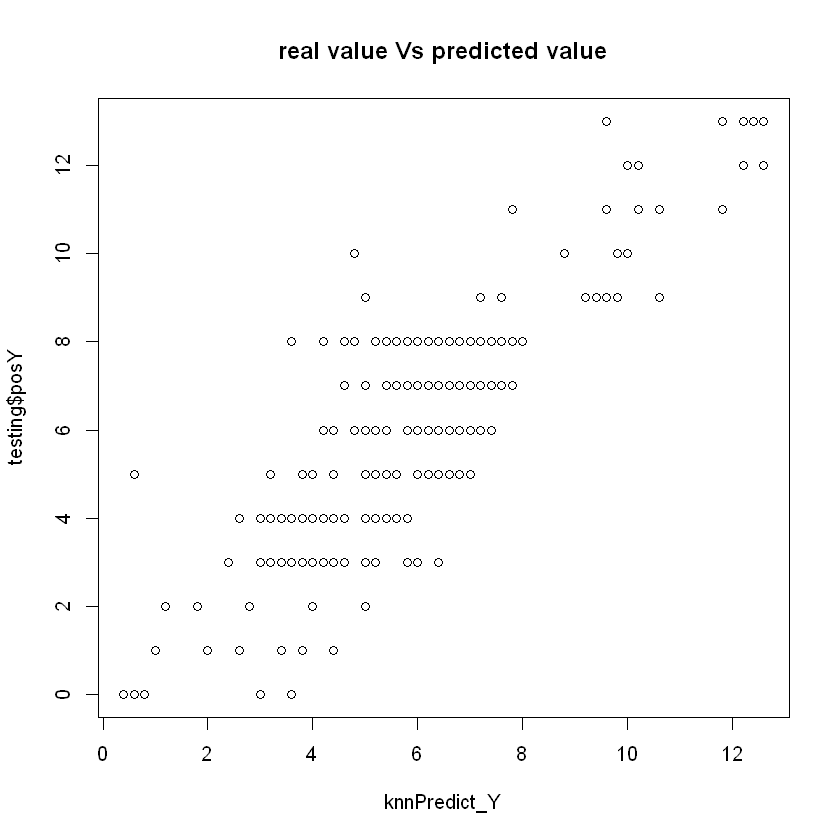

In [154]:
# 2. fit the model for y
set.seed(400)
ctrl <- trainControl(method="repeatedcv",repeats = 3) # default 10 fold cross validation during training and do 3 time the 10 fold CV
knnFit_y <- train(posY ~ ., data = training[,(names(training)!= "posX" & names(training)!= "angle")], method = "knn", trControl = ctrl, preProcess = c("center","scale"), tuneLength = 20)##tuneLengh to atomatically try 20  k value

#Output of kNN fit
knnFit_y
knnPredict_Y <- predict(knnFit_y,newdata = testing_Y)

RMSE(knnPredict_Y, testing$posY)

## show how error graoh real value Vs predicted value
plot(knnPredict_Y, testing$posY,main = "real value Vs predicted value")